<a href="https://colab.research.google.com/github/ZiyaSherzeen/VRP/blob/main/globallogistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib deap

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

In [ ]:
num_locations =10
locations =[(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)]
depot = (50,50)
num_vehicles =3

In [ ]:
creator.create("FitnessMin",base.Fitness, weights=(-1.0,-1.0) )
creator.create("Individual",list, fitness=creator.FitnessMin)

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [ ]:
toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)
toolbox.register("individual",tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [ ]:
def evalVRP(individual):
    total_distance = 0
    distances = []  # Track distance traveled by each vehicle for balance calculation
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):

        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))


        total_distance += vehicle_distance
        distances.append(vehicle_distance)

    balance_penalty = np.std(distances)  # Use standard deviation of distances as a penalty for imbalance among vehicles
    return total_distance , balance_penalty



In [ ]:
toolbox.register("evaluate",evalVRP)

In [ ]:
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate",tools.mutShuffleIndexes, indpb=0.2 )
toolbox.register("select", tools.selTournament, tournsize=3)

In [ ]:
def plot_routes(individual, title="Routes"):
  plt.figure()
  for (x,y) in locations:
    plt.plot(x,y,'bo')
  plt.plot(depot[0],depot[1],'ro')
  for i in range(num_vehicles):
    vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
    plt.plot(*zip(*vehicle_route),'-','rs')
  plt.title('Optimal Route')
  plt.xlabel('X Coordinate')
  plt.ylabel('Y Coordinate')
  plt.show()

gen	nevals	avg    	min    
0  	300   	372.508	3.86648
1  	226   	355.025	3.86352
2  	240   	352.885	5.18218
3  	226   	347.765	4.208  
4  	239   	346.25 	2.27971
5  	226   	342.525	0.513613
6  	240   	340.913	3.97181 
7  	247   	342.112	3.97181 
8  	236   	340.464	2.95022 
9  	243   	338.375	1.38499 
10 	239   	333.834	3.37722 
11 	230   	332.532	6.43313 
12 	248   	339.24 	3.01496 
13 	222   	333.015	5.67182 
14 	243   	332.751	4.057   
15 	243   	329.284	5.77343 
16 	239   	326.602	5.27392 
17 	219   	322.486	3.27109 
18 	219   	313.321	4.24371 
19 	225   	313.345	4.22521 
20 	256   	308.807	14.8287 
21 	232   	304.455	12.8312 
22 	214   	297.097	4.84885 
23 	237   	298.106	17.2914 
24 	233   	299.792	14.636  
25 	236   	296.084	18.3902 
26 	221   	296.691	14.4757 
27 	239   	296.615	15.9767 
28 	222   	295.278	24.0866 
29 	244   	296.487	13.3804 
30 	242   	298.297	25.1297 
31 	232   	296    	21.1411 
32 	223   	295.347	15.6845 
33 	224   	298.138	33.0697 
34 	229   	296.717	21.2184

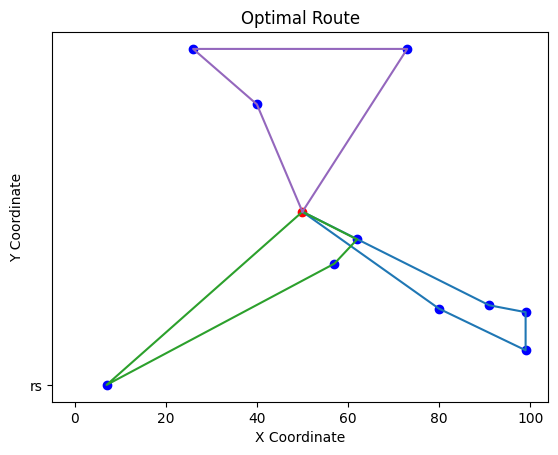

In [ ]:
def main():
    random.seed(42)  # Seed for reproducibility
    pop = toolbox.population(n=300)  # Generate initial population
    hof = tools.HallOfFame(1)  # Hall of Fame to store the best individual

    # Setup statistics to track
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Run the genetic algorithm
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof)

    # Plot the best route found
    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof

if __name__ == "__main__":
    main()